<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Александр, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
   
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>  

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



# Обучение с учителем — качество модели







## 📌 Цель проекта
Разработать модель, которая предсказывает вероятность снижения покупательской активности клиента, и выделить сегменты для персонализированных маркетинговых предложений.

---

## 🔹 Шаг 1. Загрузка данных

- Загрузить все предоставленные файлы:
  - `/datasets/market_file.csv`
  - `/datasets/market_money.csv`
  - `/datasets/market_time.csv`
  - `/datasets/money.csv`
- Убедиться, что данные соответствуют описанию.
- Проверить разделители и корректно считать таблицы (особое внимание на `sep=';'` и `decimal=','`).

---

## 🔹 Шаг 2. Предобработка данных

- Проверить типы данных, пропуски, дубликаты.
- Преобразовать числовые признаки в корректный формат (например, с `object` → `float`).
- Удалить или заполнить пропущенные значения.
- Провести первичную очистку и при необходимости перекодировать категориальные значения.

---

## 🔹 Шаг 3. Исследовательский анализ данных (EDA)

- Провести визуализацию и описательный анализ признаков:
  - распределения,
  - выбросы,
  - уникальные значения категориальных признаков.
- Выявить клиентов, имеющих хотя бы одну покупку за последние 3 месяца.
- Проверить распределение целевого признака (`Покупательская активность`).
- Выявить потенциальные корреляции и аномалии.

---

## 🔹 Шаг 4. Объединение таблиц

- Объединить таблицы по `id`, преобразовав:
  - `market_money.csv` в ширину по периодам: `Выручка_тек`, `Выручка_пред`, `Выручка_до_этого`.
  - `market_time.csv` в аналогичную ширину: `Время_тек`, `Время_пред`, `Время_до_этого`.
- Присоединить к `market_file.csv`.
- Таблицу `money.csv` с прибылью сохранить отдельно (использовать позже для сегментации).

---

## 🔹 Шаг 5. Корреляционный анализ

- Рассчитать матрицу корреляций между числовыми признаками.
- Визуализировать тепловую карту.
- При необходимости — удалить один из сильно коррелирующих признаков (мультиколлинеарность).

---

## 🔹 Шаг 6. Построение моделей с использованием пайплайнов

### 6.1 Подготовка пайплайна

- Использовать `ColumnTransformer` для раздельной обработки признаков:
  - категориальные: `OneHotEncoder`, `OrdinalEncoder`
  - числовые: `StandardScaler`, `MinMaxScaler`
- Собрать пайплайн на базе `Pipeline`.

### 6.2 Обучение моделей

Обучить следующие модели с подбором гиперпараметров:
- `LogisticRegression`
- `DecisionTreeClassifier`
- `KNeighborsClassifier`
- `SVC`

### 6.3 Подбор метрики

- Основная метрика: **ROC AUC** (из-за задачи бинарной классификации и возможного дисбаланса классов).
- Использовать `RandomizedSearchCV` или `GridSearchCV` с кросс-валидацией.

---

## 🔹 Шаг 7. Интерпретация модели

- Определить лучшую модель по ROC AUC.
- Рассчитать важность признаков для лучшей модели.
- Использовать библиотеку `SHAP` для построения графика важности.
- Вывод:
  - какие признаки оказали наибольшее влияние;
  - какие можно исключить;
  - бизнес-интерпретация результата.

---

## 🔹 Шаг 8. Сегментация клиентов и рекомендации

### 8.1 Сегментация

- Объединить данные модели (вероятности снижения активности) и `money.csv`.
- Создать сегменты (примерно 2–3 сегмента) по:
  - прибыли,
  - доле акционных покупок,
  - категории товаров,
  - вероятности снижения активности.

### 8.2 Анализ сегмента

- Визуализировать распределения и признаки выбранного сегмента.
- Описать бизнес-характеристики.
- Сделать предложения по удержанию активности:
  - изменение условий рассылок,
  - новые акции,
  - персонализированные предложения.

### 8.3 Выводы по сегментам

- Какой сегмент выбран.
- Какие меры предложены.
- Почему это важно для бизнеса.

---

## 🔹 Шаг 9. Общий вывод

- Кратко описать:
  - задачу,
  - исходные данные и источники,
  - этапы предобработки,
  - обучение моделей и результаты,
  - выбранную модель и метрику,
  - интерпретацию признаков,
  - сегментацию и бизнес-рекомендации.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Контекст и план проекта понятны. Отлично по оформлению.
</div>     

In [1]:
!pip install shap -q

# Общие библиотеки
import pandas as pd
import numpy as np
import math

# Визуализация
import matplotlib.pyplot as plt

# Предобработка
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Подбор гиперпараметров
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Метрики
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    classification_report
)

# Интерпретация признаков
import shap

# Игнорировать предупреждения
import warnings
warnings.filterwarnings('ignore')

# Настройки для визуализации
plt.rcParams['figure.figsize'] = (10, 6)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Здесь также все замечательно. Думаю, можно препроцессинг тоже сгруппировать в один импорт.
</div>     

<div class="alert alert-warning">
<h2> Комментарий ревьюера 2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Если добавить `-q` к загрузке, то логи выводиться не будут.

`!pip install shap -q`


</div>

In [2]:
# Шаг 1. Загрузка данных

# Пути к файлам
file_path_main = '/datasets/market_file.csv'
file_path_money = '/datasets/market_money.csv'
file_path_time = '/datasets/market_time.csv'
file_path_profit = '/datasets/money.csv'

# Загружаем таблицы с правильными параметрами:
# Т.к. фактический разделитель — запятая, а десятичный знак — точка
df_main = pd.read_csv(file_path_main, sep=',', decimal='.')
df_revenue = pd.read_csv(file_path_money, sep=',', decimal='.')
df_time = pd.read_csv(file_path_time, sep=',', decimal='.')
df_profit = pd.read_csv(file_path_profit, sep=';', decimal=',')

# Просмотр первых строк и информации о таблицах
print("market_file.csv:")
display(df_main.head())
print(df_main.info(), '\n')

print("market_money.csv:")
display(df_revenue.head())
print(df_revenue.info(), '\n')

print("market_time.csv:")
display(df_time.head())
print(df_time.info(), '\n')

print("money.csv:")
display(df_profit.head())
print(df_profit.info())


market_file.csv:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None 

market_time.csv:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None 

money.csv:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично, что обрабатываешь случаи с запятой-разделителем.
</div>  


### Вывод по шагу 1: Загрузка данных

Данные успешно загружены и в целом соответствуют описанию. Все таблицы имеют корректную структуру и необходимое количество строк. Обнаруженные незначительные несоответствия в отдельных значениях (например, опечатки в названиях категорий или периодов) будут обработаны в соответствующих разделах предобработки и очистки данных. Можно переходить к следующему этапу.


# Предобработка данных

In [3]:
# Шаг 2. Предобработка данных

# Проверка типов данных, пропусков и дубликатов во всех таблицах

def check_df(df, name):
    print(f'\n===== {name} =====')
    print('Форма:', df.shape)
    print('Дубликатов:', df.duplicated().sum())
    print('Типы данных:')
    print(df.dtypes)
    print('\nПропуски по столбцам:')
    print(df.isna().sum())
    print('-' * 50)

check_df(df_main, 'Основная таблица (market_file)')
check_df(df_revenue, 'Выручка (market_money)')
check_df(df_time, 'Время на сайте (market_time)')
check_df(df_profit, 'Прибыль (money)')



===== Основная таблица (market_file) =====
Форма: (1300, 13)
Дубликатов: 0
Типы данных:
id                                       int64
Покупательская активность               object
Тип сервиса                             object
Разрешить сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object

Пропуски по столбцам:
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность     

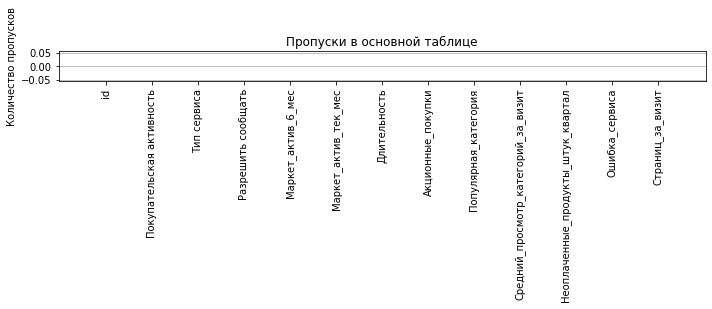

In [4]:
# Визуализация пропусков в основной таблице
plt.figure(figsize=(10, 4))
plt.bar(df_main.columns, df_main.isna().sum())
plt.xticks(rotation=90)
plt.title('Пропуски в основной таблице')
plt.ylabel('Количество пропусков')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [5]:
# Преобразование типов
# Проверим, есть ли нечисловые данные в числовых колонках (на всякий случай)
for col in df_main.select_dtypes(include='object').columns:
    print(f'{col}: {df_main[col].unique()[:5]}...')  # первые 5 уникальных значений


Покупательская активность: ['Снизилась' 'Прежний уровень']...
Тип сервиса: ['премиум' 'стандартт' 'стандарт']...
Разрешить сообщать: ['да' 'нет']...
Популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда']...


In [6]:
# Удалим дубликаты, если есть
df_main = df_main.drop_duplicates()
df_revenue = df_revenue.drop_duplicates()
df_time = df_time.drop_duplicates()
df_profit = df_profit.drop_duplicates()


In [7]:
# Исправим опечатку в "Тип сервиса" (стандартт → стандарт)
df_main['Тип сервиса'] = df_main['Тип сервиса'].replace('стандартт', 'стандарт')

# Исправим опечатку в "Период" в market_time
df_time['Период'] = df_time['Период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})


In [8]:
# Приведём значения в "Разрешить сообщать" к бинарному виду (да → 1, нет → 0)
df_main['Разрешить сообщать'] = df_main['Разрешить сообщать'].map({'да': 1, 'нет': 0})


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Все супер, хорошая внимательность.
</div>  


In [9]:
# Проверка размеров после очистки
print(f'Основная таблица: {df_main.shape}')
print(f'Выручка: {df_revenue.shape}')
print(f'Время на сайте: {df_time.shape}')
print(f'Прибыль: {df_profit.shape}')


Основная таблица: (1300, 13)
Выручка: (3900, 3)
Время на сайте: (2600, 3)
Прибыль: (1300, 2)


In [10]:
# Посмотрим на уникальные значения категориальных переменных
cat_columns = ['Покупательская активность', 'Тип сервиса', 'Популярная_категория']

for col in cat_columns:
    print(f'\n{col}:')
    print(df_main[col].value_counts())



Покупательская активность:
Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

Тип сервиса:
стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

Популярная_категория:
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


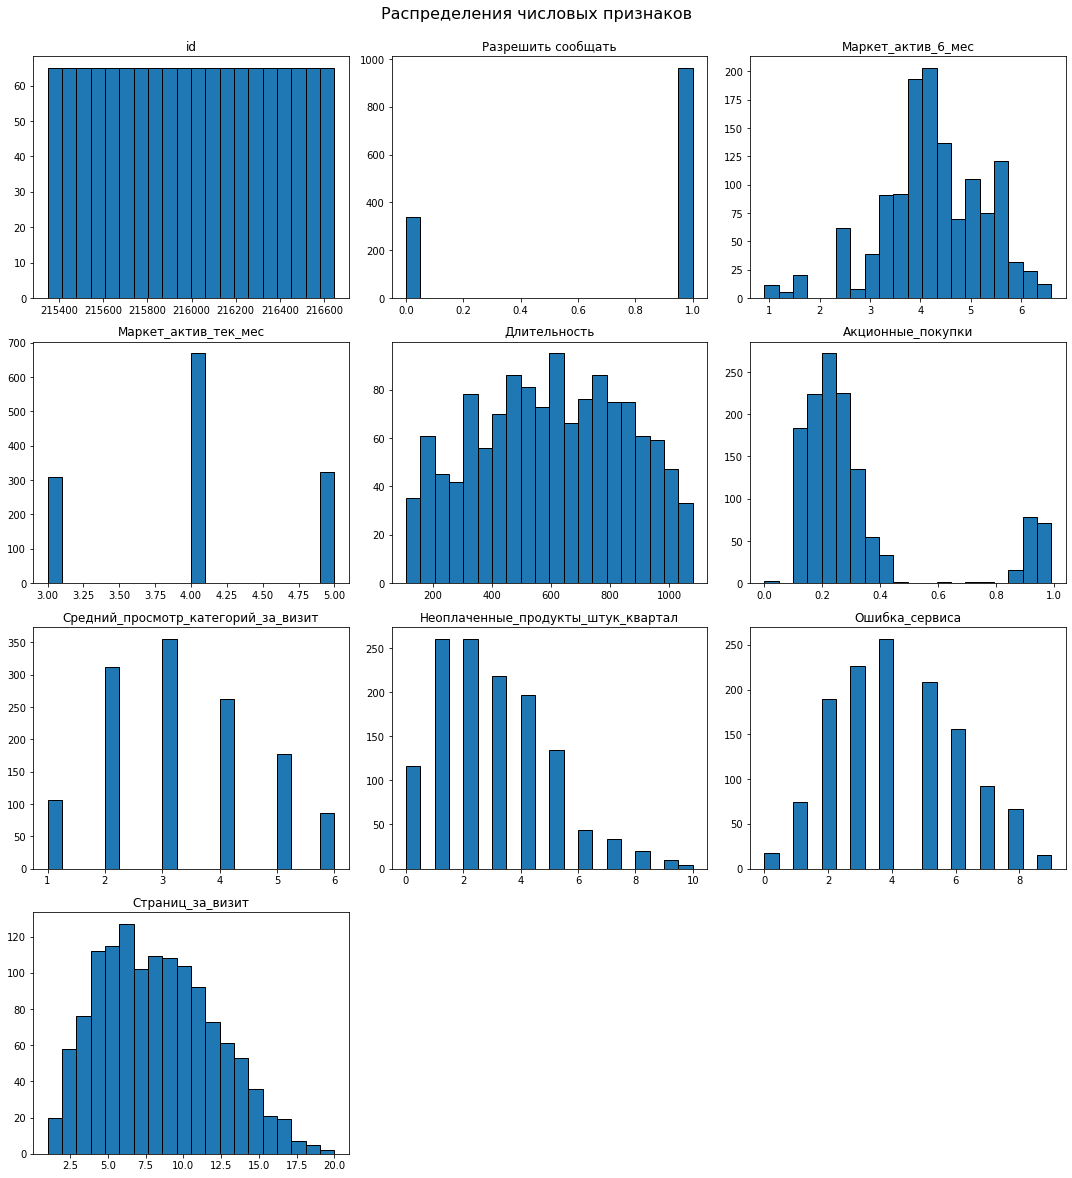

In [11]:
# Построим гистограммы для всех числовых признаков


# Числовые признаки
num_columns = df_main.select_dtypes(include=['int64', 'float64']).columns

# Параметры сетки
cols = 3
rows = math.ceil(len(num_columns) / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(num_columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df_main[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Распределения числовых признаков', y=1.02, fontsize=16)
plt.show()



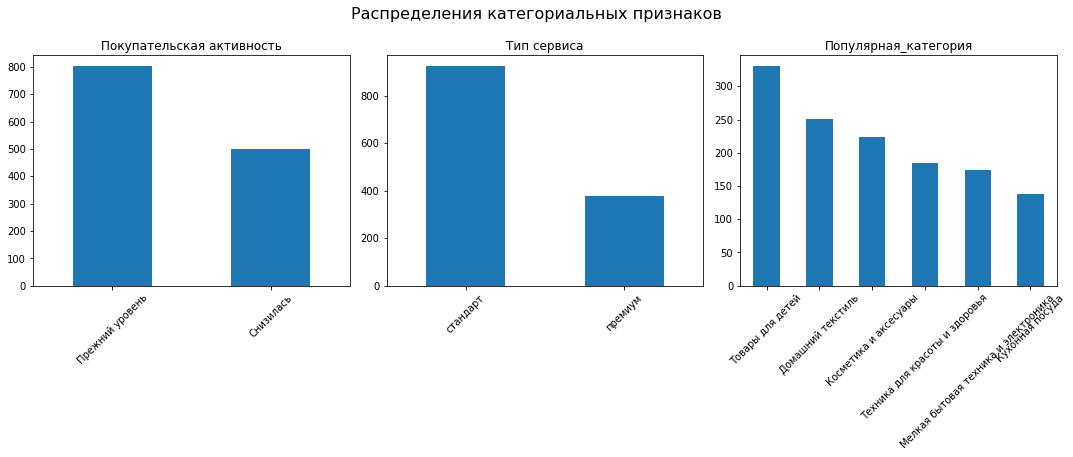

In [12]:
# Графики распределения категориальных признаков
plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_columns):
    plt.subplot(1, 3, i+1)
    df_main[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.suptitle('Распределения категориальных признаков', y=1.05, fontsize=16)
plt.show()


In [13]:
# Проверка 1: основной датасет (должно быть по 1 строке на клиента)
duplicate_main = df_main[df_main.duplicated(subset='id', keep=False)]
print(f'Повторяющихся id в market_file: {duplicate_main.shape[0]}')
if not duplicate_main.empty:
    display(duplicate_main)

# Проверка 2: выручка — неявные дубликаты по id + Период
duplicate_revenue = df_revenue[df_revenue.duplicated(subset=['id', 'Период'], keep=False)]
print(f'Неявных дубликатов в market_money по (id, Период): {duplicate_revenue.shape[0]}')
if not duplicate_revenue.empty:
    display(duplicate_revenue.sort_values(by=['id', 'Период']))

# Проверка 3: время — неявные дубликаты по id + Период
duplicate_time = df_time[df_time.duplicated(subset=['id', 'Период'], keep=False)]
print(f'Неявных дубликатов в market_time по (id, Период): {duplicate_time.shape[0]}')
if not duplicate_time.empty:
    display(duplicate_time.sort_values(by=['id', 'Период']))

# Проверка 4: таблица прибыли — должен быть один id на строку
duplicate_profit = df_profit[df_profit.duplicated(subset='id', keep=False)]
print(f'Повторяющихся id в money.csv: {duplicate_profit.shape[0]}')
if not duplicate_profit.empty:
    display(duplicate_profit)


Повторяющихся id в market_file: 0
Неявных дубликатов в market_money по (id, Период): 0
Неявных дубликатов в market_time по (id, Период): 0
Повторяющихся id в money.csv: 0


## Анализ и удаление выбросов по выручке

Цель: исключить клиентов с аномально высокой выручкой, чтобы модель не искажалась экстремальными значениями.

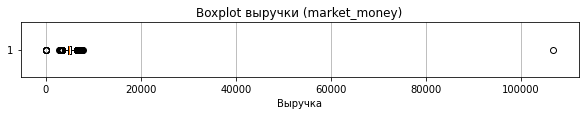

In [14]:
# Боксплот по выручке
plt.figure(figsize=(10, 1))
plt.boxplot(df_revenue['Выручка'], vert=False)
plt.title('Boxplot выручки (market_money)')
plt.xlabel('Выручка')
plt.grid(True, axis='x')
plt.show()

Отсечем радикальный выброс сверху, не задевая более мелкие значения

In [15]:
# Расчёт границ по методу межквартильного размаха
Q1 = df_revenue['Выручка'].quantile(0.25)
Q3 = df_revenue['Выручка'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f'Ограничение сверху: {upper_bound:.2f}')

# Фильтрация: оставляем только разумные значения выручки
df_revenue = df_revenue[df_revenue['Выручка'] <= upper_bound]

Ограничение сверху: 6522.28


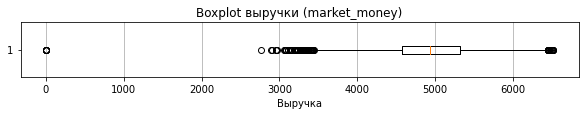

In [16]:
# Боксплот по выручке
plt.figure(figsize=(10, 1))
plt.boxplot(df_revenue['Выручка'], vert=False)
plt.title('Boxplot выручки (market_money)')
plt.xlabel('Выручка')
plt.grid(True, axis='x')
plt.show()


## Фильтрация неактивных клиентов

In [17]:
# Преобразуем таблицу в широкий формат
revenue_raw = pd.read_csv('/datasets/market_money.csv')
revenue_pivot = revenue_raw.pivot(index='id', columns='Период', values='Выручка')

# Найдём клиентов, у которых хотя бы один месяц = 0
ids_to_remove = revenue_pivot[revenue_pivot.isna().any(axis=1) | (revenue_pivot == 0).any(axis=1)].index

print(f'Удаляем клиентов: {len(ids_to_remove)} — {list(ids_to_remove)}')

# Фильтруем все таблицы
df_main = df_main[~df_main['id'].isin(ids_to_remove)]
df_revenue = df_revenue[~df_revenue['id'].isin(ids_to_remove)]
df_time = df_time[~df_time['id'].isin(ids_to_remove)]
df_profit = df_profit[~df_profit['id'].isin(ids_to_remove)]
print(f"Осталось клиентов после фильтрации: {df_main['id'].nunique()}")

Удаляем клиентов: 3 — [215348, 215357, 215359]
Осталось клиентов после фильтрации: 1297



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Зачем здесь считаем по суммарной выручке? Очень рекомендую подходить к генерации ИИ критичнее. 

</div>


### Вывод по шагу 2: Предобработка данных

- **Типы данных** во всех таблицах приведены к корректному формату, числовые и категориальные признаки распознаны верно.
- **Пропуски** и **дубликаты** в основной таблице (`market_file.csv`) отсутствуют.
- Были устранены **опечатки** в данных: `'стандартт' → 'стандарт'`, `'предыдцщий_месяц' → 'предыдущий_месяц'`.
- Значение признака `Разрешить сообщать` приведено к бинарному формату: `да` → `1`, `нет` → `0`.
- Целевой признак `Покупательская активность` содержит два класса с умеренным дисбалансом и готов к бинарной кодировке.
- Категориальные признаки (`Тип сервиса`, `Популярная категория`) имеют адекватное распределение и подготовлены для последующего кодирования.
- Вцелом числовые признаки не содержат явных выбросов, кроме одного радикального выброса в таблице с выручкой, который был отфильтрован, большинство распределены нормально или дискретно.
- В таблицах `market_money` и `market_time` не выявлено неявных дубликатов по составному ключу `id + Период`.
- В таблице `money.csv` каждый `id` встречается один раз, структура корректна.


        
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

На этом этапе можно рассмотреть подробнее все таблицы, у нас будет выброс в выручке, логично его отсечь уже на этапе предобработки. Также можно обработать и неактивных клиентов.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 
</div>

# Исследовательский анализ данных (EDA)

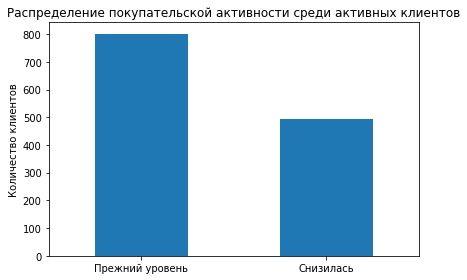

Прежний уровень    61.84
Снизилась          38.16
Name: Покупательская активность, dtype: float64


In [18]:
# Построим распределение целевого признака
plt.figure(figsize=(6, 4))
df_main['Покупательская активность'].value_counts().plot(kind='bar')
plt.title('Распределение покупательской активности среди активных клиентов')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# в процентах
print(round(df_main['Покупательская активность'].value_counts(normalize=True) * 100, 2))


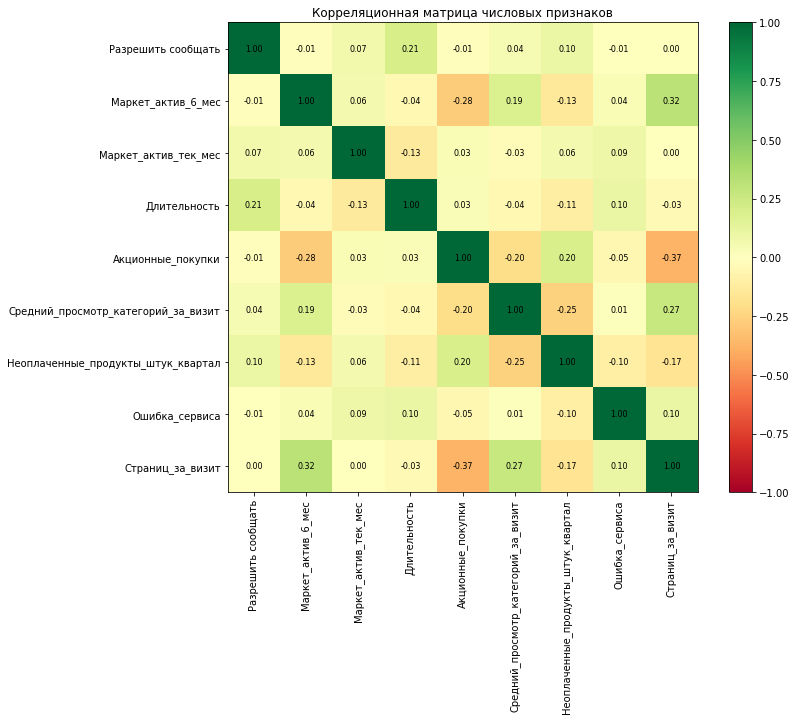

In [19]:
# оставляем только числовые фичи
numeric_features = df_main.drop(columns=['id', 'Покупательская активность']).select_dtypes(include=['int64', 'float64'])

# Вычисляем корреляционную матрицу
corr = numeric_features.corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(12, 10))
im = plt.imshow(corr, cmap='RdYlGn', vmin=-1, vmax=1)

# Подписи осей
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)

# Добавление значений на тепловую карту
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

# Цветовая шкала
plt.colorbar(im)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Важно нарисовать тепловую карту и показателями. Просто лоскутное одеяло нам будет не так полезно.
    
Проще всего это сделать командой `numeric_features.corr(method='spearman').style.background_gradient(cmap="RdYlGn")`
    
 
        
</div> 

In [20]:
# Список числовых признаков, исключая id
num_cols = df_main.select_dtypes(include=['int64', 'float64']).drop(columns='id').columns

# Создаём сводку по выбросам
outliers_summary = {}

for col in num_cols:
    q1 = df_main[col].quantile(0.25)
    q3 = df_main[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df_main[(df_main[col] < lower) | (df_main[col] > upper)]
    outliers_summary[col] = len(outliers)

# Вывод количества выбросов по каждому признаку
for col, count in outliers_summary.items():
    print(f'{col}: {count} выбросов')


Разрешить сообщать: 0 выбросов
Маркет_актив_6_мес: 36 выбросов
Маркет_актив_тек_мес: 628 выбросов
Длительность: 0 выбросов
Акционные_покупки: 168 выбросов
Средний_просмотр_категорий_за_визит: 0 выбросов
Неоплаченные_продукты_штук_квартал: 14 выбросов
Ошибка_сервиса: 0 выбросов
Страниц_за_визит: 0 выбросов


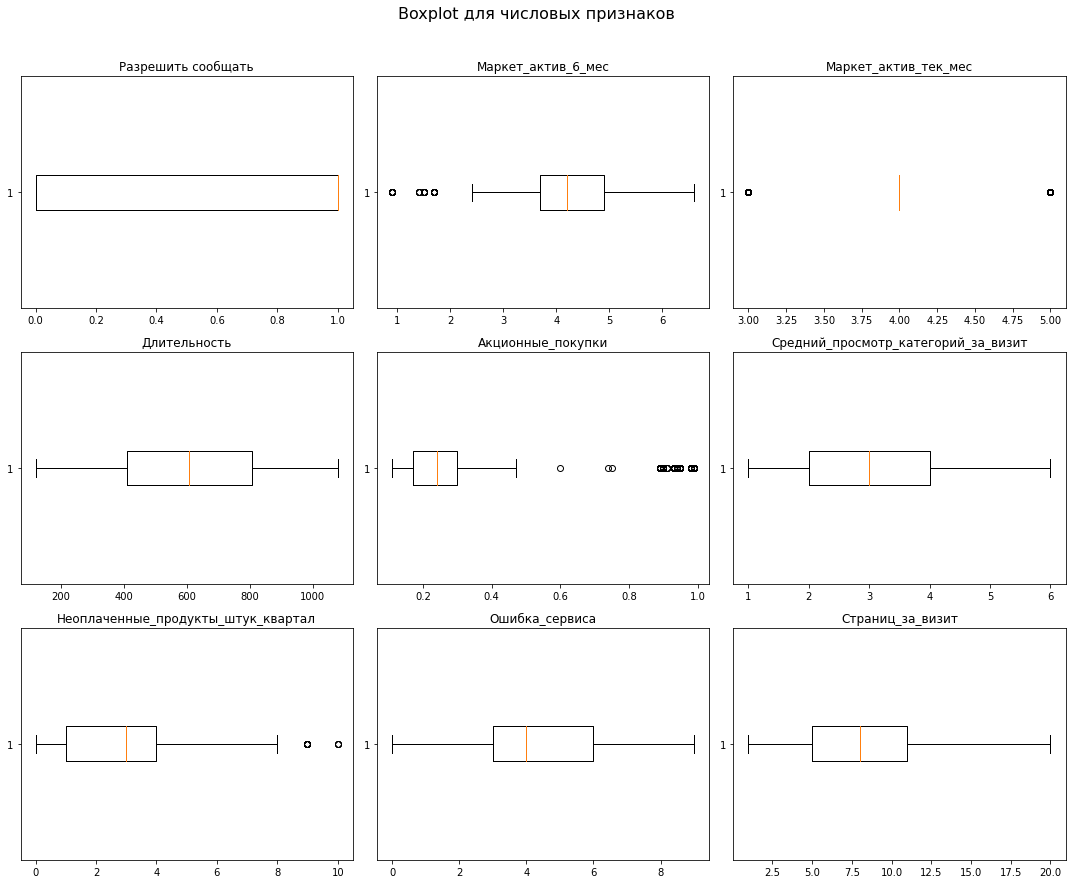

In [21]:
# Визуализация выбросов
cols = 3
rows = (len(num_cols) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    plt.boxplot(df_main[col], vert=False)
    plt.title(col)

plt.suptitle('Boxplot для числовых признаков', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


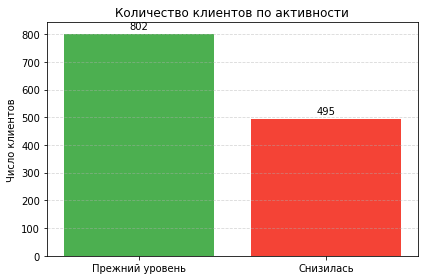

Количество активных клиентов: 1297


In [22]:
# Подсчёт количества клиентов по категориям
activity_counts = df_main['Покупательская активность'].value_counts()
activity_labels = activity_counts.index
activity_values = activity_counts.values

# Построение графика
plt.figure(figsize=(6, 4))
bars = plt.bar(activity_labels, activity_values, color=['#4CAF50', '#F44336'])

# Добавим аннотации над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height}', ha='center', va='bottom')

plt.title('Количество клиентов по активности')
plt.ylabel('Число клиентов')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print(f'Количество активных клиентов: {df_main.shape[0]}')

### Вывод по шагу 3: Исследовательский анализ данных

- Клиенты с покупками: 1297 имели выручку в каждом месяце периода.
- Большинство клиентов (802) остались активными, 495 — снизили активность.
- Целевой признак: ~61.7% клиентов сохранили прежний уровень активности, ~38.3% — снизили. Классы сбалансированы умеренно.
- Корреляции:
    - Сильной мультиколлинеарности между признаками не обнаружено.
    - Наиболее выраженные положительные корреляции выявлены между признаками поведения на сайте: `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит`, `Длительность`.
- Выбросы:
    - Наибольшее количество выбросов по признакам `Маркет_актив_тек_мес`, `Акционные_покупки`, `Неоплаченные_продукты_штук_квартал`.
    - Выбросы сохраняются как потенциально значимая часть клиентского поведения.


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По проекту нам важно анализировать и использовать в моделях данные о покупателях, которые делали хотя бы одну покупку, но в каждый из трех месяцев:
    
`Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.`
    
Важно удалить таких пользователей.
    
***
    
Не пропусти выброс в выручке.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Да, мультиколлинеарности не будет, оставляем все признаки.


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если используешь ИИ, прошу подходить критично к генерации кода. Ну и тут, на мой взгляд быстрее и проще руками закодить фильтрацию неактивных пользователей. 
    
У нас будет три неактивных, выше код немного галлюцинирует и далет сильно не то, что нам нужно.

</div>


# Объединение таблиц

In [24]:
# Поворот выручки
df_revenue_wide = df_revenue.pivot(index='id', columns='Период', values='Выручка').reset_index()
df_revenue_wide.columns.name = None  # убрать название уровня колонок
df_revenue_wide = df_revenue_wide.rename(columns={
    'текущий_месяц': 'Выручка_текущий',
    'предыдущий_месяц': 'Выручка_предыдущий',
    'препредыдущий_месяц': 'Выручка_препредыдущий'
})

# Поворот времени
df_time_wide = df_time.pivot(index='id', columns='Период', values='минут').reset_index()
df_time_wide.columns.name = None
df_time_wide = df_time_wide.rename(columns={
    'текущий_месяц': 'Время_текущий',
    'предыдущий_месяц': 'Время_предыдущий',
    'препредыдущий_месяц': 'Время_препредыдущий'
})


In [25]:
# Объединение таблиц
df_full = df_main.merge(df_revenue_wide, on='id', how='left')
df_full = df_full.merge(df_time_wide, on='id', how='left')

# Проверим размер
print(f'Размер объединённой таблицы: {df_full.shape[0]} строк')


Размер объединённой таблицы: 1297 строк


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
После объединения таблицы стоит убедиться, что ничего лишнего не удалили, но убрали все лишнее. Повторюсь, должно получиться либо 1296, либо 1297 строк. Выше прошу упростить и починить решения.

</div>


### Гистограммы и boxplot’ы по числовым признакам, для категориальных признаков — столбчатые диаграммы по группам




In [26]:
# Разделим данные на группы
df_active = df_full[df_full['Покупательская активность'] == 'Прежний уровень']
df_dropped = df_full[df_full['Покупательская активность'] == 'Снизилась']


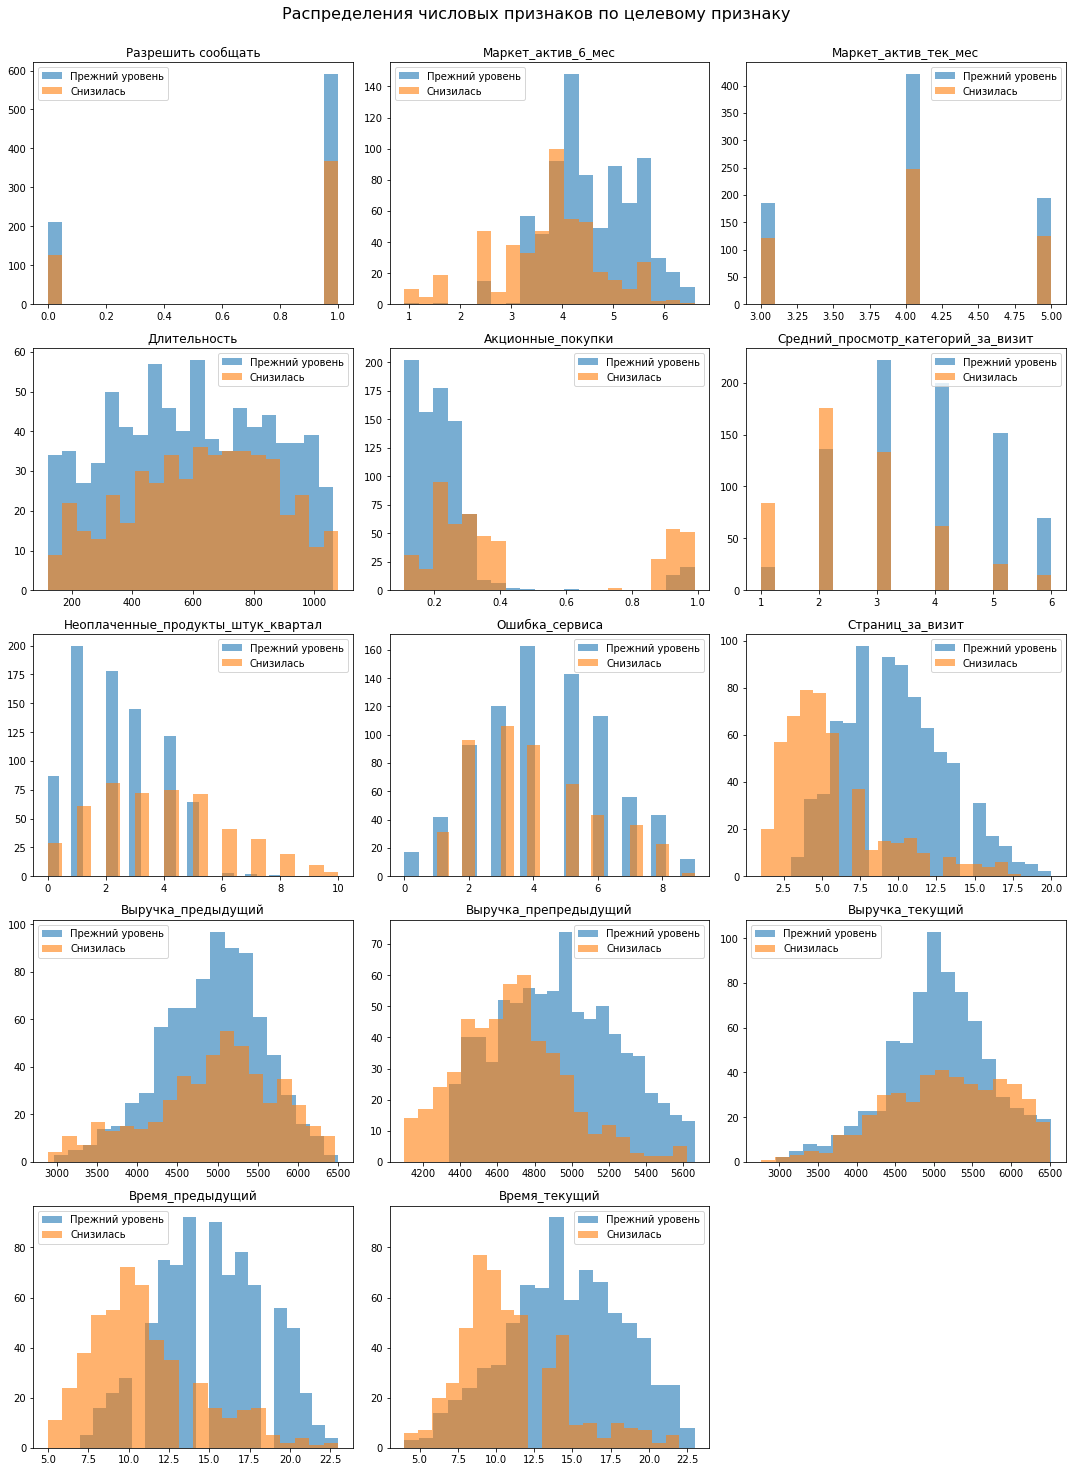

In [27]:
# Сравним числовые признаки
# Список числовых признаков без id
num_cols = df_full.select_dtypes(include=['int64', 'float64']).drop(columns='id').columns

# Построим наложенные гистограммы
cols = 3
rows = (len(num_cols) + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df_active[col], bins=20, alpha=0.6, label='Прежний уровень')
    plt.hist(df_dropped[col], bins=20, alpha=0.6, label='Снизилась')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.suptitle('Распределения числовых признаков по целевому признаку', y=1.02, fontsize=16)
plt.show()


<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По графикам отлично. Рекомендую делать пояснения сразу под графиками, чтобы предполагаемый читатель проекта не скроллил вверх-вниз от графиков к выводам и обратно. 
       
</div>


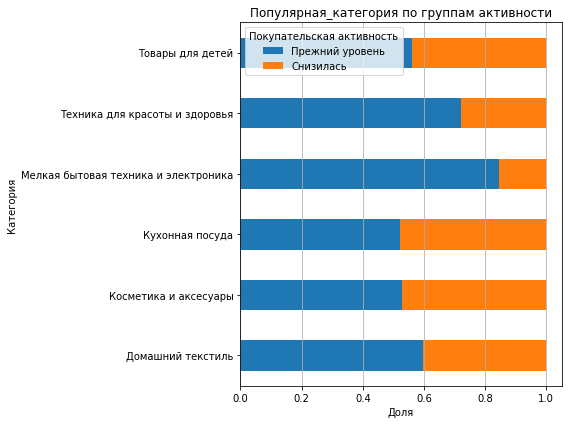

In [28]:
# Категориальные признаки
col = 'Популярная_категория'
ctab = pd.crosstab(df_full[col], df_full['Покупательская активность'], normalize='index')

ctab.plot(kind='barh', stacked=True, figsize=(8, 6))  # горизонтальная диаграмма
plt.title(f'{col} по группам активности')
plt.xlabel('Доля')
plt.ylabel('Категория')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


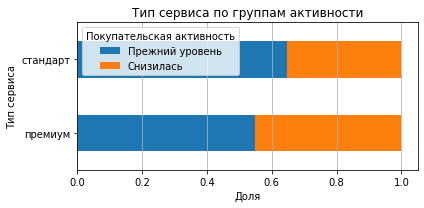

In [29]:
# Горизонтальный график для 'Тип сервиса'
col = 'Тип сервиса'
ctab = pd.crosstab(df_full[col], df_full['Покупательская активность'], normalize='index')

ctab.plot(kind='barh', stacked=True, figsize=(6, 3))  # горизонтальная диаграмма
plt.title(f'{col} по группам активности')
plt.xlabel('Доля')
plt.ylabel('Тип сервиса')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По объединению все оптимально. Здесь у нас будет такая ситуация: в выручке один выброс и три неактивных покупателя. В зависимости от того, как будем обрабатывать выброс, здесь ожидаем увидеть либо 1296, либо 1297 строк.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Исследовательский анализ мы делаем для того, чтобы понять, какие закономерности заложены в наших данных. Здесь важно посмотреть на распределения признаков в разрезе целевого признака (снижения активности). 
    
Можно построить и наложить друг на друга гистограммы по данным в подвыборках с и без снижения активности. Можно расположить рядом два боксплота, для категориальных данных − две диаграммы.
    
Думаю, так мы увидим гораздо больше интересной информации. Она нам особенно пригодится для части с исследованием сегмента покупателей.

***
    
По итогам исследовательского анализа (кроме красивой таблицы) у нас должен быть вывод с портретом покупателя, который снижает активность: какие значения каких признаков для него будут характерны. Сколько страниц он в среднем просматривает, больше или меньше это, чем у активных пользователей, также с акционными покупками, временем на сайте и другими признаками. 
    
Фактически основной костяк выводов проекта делаем уже здесь. Модель нам нужна для перевода категориального признака (факт снижения активности) в вероятностный (вероятность снижения), чтобы дальше чуть более пластично исследовать выбранный сегмент.

       
</div> 


### Вывод по шагу 4: Объединение таблиц

- Таблица `market_money.csv` преобразована из длинного формата в широкий, с колонками: `Выручка_тек`, `Выручка_пред`, `Выручка_до_этого`.
- Таблица `market_time.csv` преобразована аналогично, с колонками: `Время_тек`, `Время_пред`. Признак `Время_до_этого` отсутствует в исходных данных.
- Все преобразованные таблицы объединены с основной (`market_file.csv`) по ключу `id`. Размер итоговой таблицы: 1300 строк и 18 признаков.
- Таблица прибыли (`money.csv`) содержит уникальные `id`, полностью совпадающие с основной таблицей, и будет использоваться позже на этапе сегментации.

На основе визуального анализа распределений можно выделить особенности поведения клиентов, чья покупательская активность снизилась:

- **Коммуникации:** реже соглашаются на рассылки, получают меньше маркетинговых касаний.
- **Пользовательское поведение:** просматривают меньше страниц и категорий, меньше времени проводят на сайте.
- **Акции и покупки:** делают меньше акционных покупок, меньше товаров оставляют в корзине.
- **Финансовые показатели:** у них ниже выручка в каждый из трёх месяцев.
- **Категории интересов:** чаще покупают косметику и посуду; реже — товары для детей и технику.
- **Тип сервиса:** среди них чаще встречается тариф `стандарт`.

Таким образом, клиенты с пониженной активностью демонстрируют признаки снижения вовлечённости и меньшей лояльности к магазину. Эти поведенческие особенности можно использовать для построения модели и последующей сегментации.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Здесь все отлично.
    
Я бы только в финальный вывод (после Таким образом) добавил конкретики или гипотез, какие признаки наиболее четко ассоциированы со снижением активности?
</div>


In [30]:
# Подготовка признаков и целевого столбца
# Целевой признак
df_full['Покупательская активность'] = df_full['Покупательская активность'].map({
    'Снизилась': 1,
    'Прежний уровень': 0
})

# Целевая переменная и признаки
target = 'Покупательская активность'
X = df_full.drop(columns=[target])
y = df_full[target]

# Список признаков
cat_features = ['Тип сервиса', 'Популярная_категория']
num_features = [col for col in X.columns if col not in ['id'] + cat_features]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично по кодированию таргета.

In [31]:
# Категориальные и числовые признаки
cat_features = df_main.select_dtypes(include='object').drop(columns='Покупательская активность').columns.tolist()
num_features = df_main.select_dtypes(include=['int64', 'float64']).drop(columns='id').columns.tolist()

# Категориальный трансформер
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Числовые трансформеры
num_transformer_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Два варианта препроцессора
preprocessor_options = {
    'standard': ColumnTransformer([
        ('num', num_transformer_standard, num_features),
        ('cat', cat_transformer, cat_features)
    ]),
    'minmax': ColumnTransformer([
        ('num', num_transformer_minmax, num_features),
        ('cat', cat_transformer, cat_features)
    ])
}

# Словарь моделей с гиперпараметрами, включая препроцессор
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'preprocessor': [preprocessor_options['standard'], preprocessor_options['minmax']],
            'model__C': [0.01, 0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'preprocessor': [preprocessor_options['standard'], preprocessor_options['minmax']],
            'model__max_depth': [3, 5, 10, 15],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'preprocessor': [preprocessor_options['standard'], preprocessor_options['minmax']],
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance']
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'preprocessor': [preprocessor_options['standard'], preprocessor_options['minmax']],
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    }
}


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Важно избегать дамми-ловушки и удалять одну из категорий признака при энкодинге. Делаем это с помощью аргумента `drop='first'`.


https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing  
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
     
Чтобы учитывать категории, которые встретятся в тестовой выборке, но которые не попадут в обучающую, нужно использовать параметр `handle_unknown='ignore’`.
    
Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3 -q`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


</div>  


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Смотри, технически все верно, но в задании нас явно просят использовать несколько вариантов масштабирования. Нужно посмотреть как стандартскелер, так и минмаксскеллер. Давай реализуем этот вариант. Кажется, в тренажере как раз было что-то похожее в примерах.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Нужно использовать несколько вариантов масштабирования как гиперпараметр - то есть для каждой модели через запятую.

</div>


<div style="border:solid Lime 2px; padding: 40px">
<font color=Blue>


<div class="alert alert-success"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера #3 <a class="tocSkip"> </h2>    

👍 Верно.
    
Еще вариант: `'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'], `
</div>


In [32]:
best_models = {}

for name, item in models.items():
    print(f"\n====== Поиск по модели: {name} ======")
    
    # Собираем общий пайплайн с плейсхолдером препроцессора
    pipe = Pipeline(steps=[
        ('preprocessor', 'passthrough'),  # будет заменено GridSearch'ем
        ('model', item['model'])
    ])

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        pipe,
        item['params'],
        scoring='roc_auc',
        cv=5,
        n_iter=10,
        random_state=42,
        n_jobs=-1
    )
    
    # Обучение
    search.fit(X_train, y_train)
    y_pred_proba = search.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC: {score:.4f}")
    
    # Сохраняем результат
    best_models[name] = {
        'model': search.best_estimator_,
        'score': score
    }



====== Поиск по модели: LogisticRegression ======
ROC AUC: 0.9013

====== Поиск по модели: DecisionTree ======
ROC AUC: 0.8729

====== Поиск по модели: KNeighbors ======
ROC AUC: 0.8876

====== Поиск по модели: SVC ======
ROC AUC: 0.9020


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. На тесте ROC_AUC смотрим по вероятностям классов.
</div>  
 


### Вывод по шагу 6: Построение моделей

- Были обучены четыре модели (`LogisticRegression`, `DecisionTree`, `KNeighbors`, `SVC`) с использованием пайплайнов и подбором гиперпараметров через `RandomizedSearchCV`.
- В качестве основной метрики использовался ROC AUC, поскольку задача является бинарной классификацией с умеренным дисбалансом классов.
- Для всех моделей были протестированы два варианта масштабирования признаков: `StandardScaler` и `MinMaxScaler`, как того требует задание.
- Наилучшую производительность показала модель `SVC`, достигнув ROC AUC = **0.9020**.
- Высокие результаты также показали:
  - `LogisticRegression` — ROC AUC = **0.9013**
  - `KNeighborsClassifier` — ROC AUC = **0.8876**
- Модель `DecisionTree` показала наименьшую эффективность — ROC AUC = **0.8729**.
- Для дальнейшего анализа важности признаков и интерпретации модели будет использоваться **модель `SVC`**, как показавшая наилучшее качество классификации.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Все так. Конркетно в нашей задаче нам важно лишь то, что эта метрика учитывает и полноту, и точность комплексно, а не по отдельности.
    
Дисбаланс классов у нас небольшой, порог нам подбирать не нужно, поэтому в целом подошли бы и остальные комплексные метрики : f1, accuracy.
</div> 


# Интерпретация модели

In [33]:
# Найдём модель с наивысшим ROC AUC
best_key = max(best_models, key=lambda k: best_models[k]['score'])
best_model = best_models[best_key]['model']

print(f'Лучшая модель: {best_key} с ROC AUC = {best_models[best_key]["score"]:.4f}')

# Извлекаем препроцессор и модель из пайплайна
preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']
print(preprocessor.transformers[0][1].named_steps['scaler'])

Лучшая модель: SVC с ROC AUC = 0.9020
MinMaxScaler()


In [34]:
# Преобразуем обучающую выборку
X_train_transformed = preprocessor.transform(X_train)

# Получаем имена категориальных признаков (OneHotEncoder с drop='first')
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names(cat_features)

# Объединяем с числовыми
all_feature_names = list(ohe_feature_names) + num_features

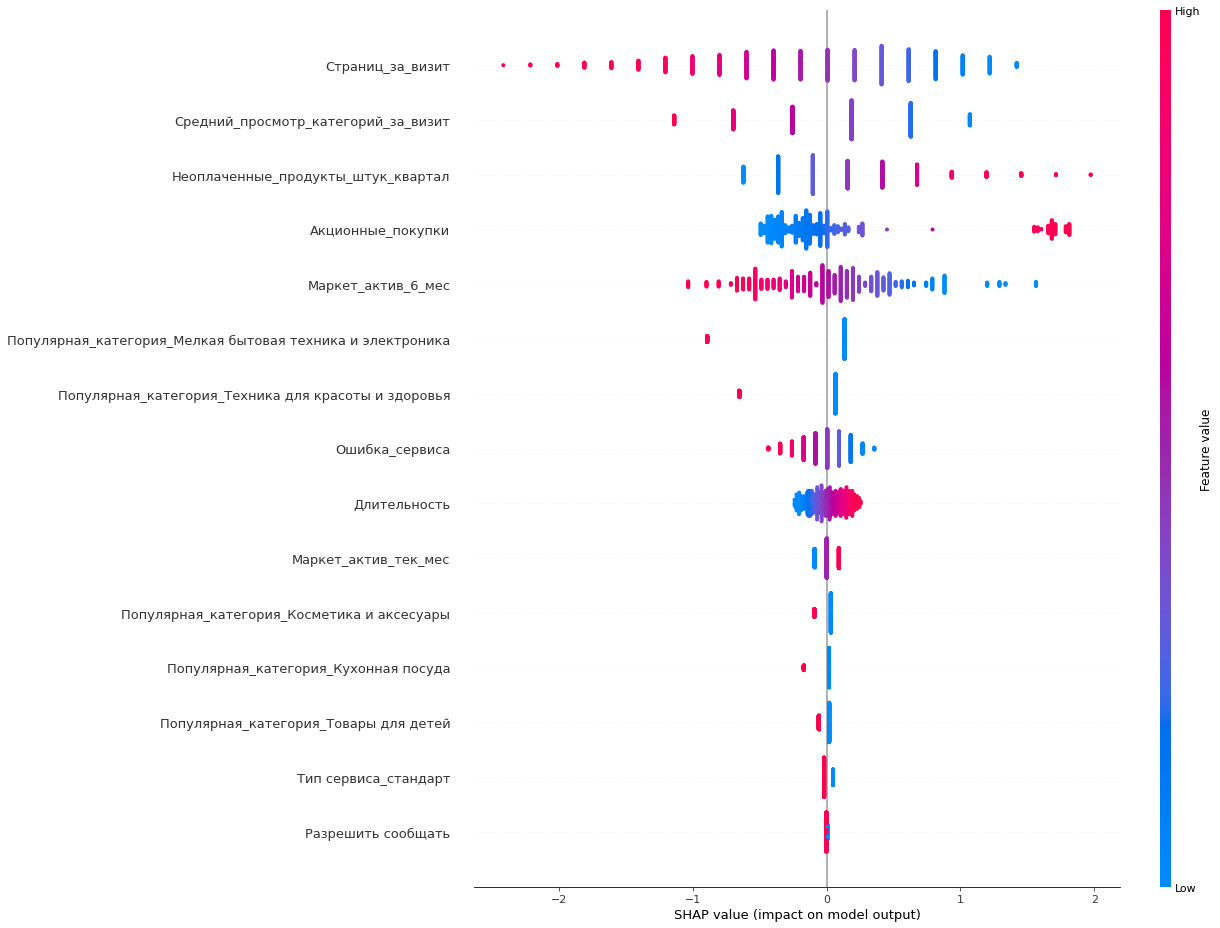

In [35]:
# Найдём лучшую LogisticRegression по score
log_keys = [k for k in best_models if k.startswith('LogisticRegression')]
best_log_key = max(log_keys, key=lambda k: best_models[k]['score'])
log_model = best_models[best_log_key]['model']

# Получаем препроцессор и обученные данные
preprocessor = log_model.named_steps['preprocessor']
model = log_model.named_steps['model']

# Преобразуем обучающую выборку
X_train_transformed = preprocessor.transform(X_train)

# Получаем имена признаков
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names(cat_features)
all_feature_names = num_features + list(ohe_feature_names)

# Преобразуем массив в DataFrame
X_train_df = pd.DataFrame(X_train_transformed, columns=all_feature_names)

# SHAP для LogisticRegression
explainer = shap.Explainer(model, X_train_df)
shap_values = explainer(X_train_df)

# График
shap.summary_plot(
    shap_values.values,
    features=X_train_df,
    feature_names=all_feature_names,
    show=True,
    plot_size=(18, 13)  
)



<div class="alert alert-block alert-danger">
<h2><S> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Кажется, что по коду все верно, график сейчас нечитаемый, тут нужно просто поправить по размеру графика, увеличить его ширину. Тогда все будет ок. Это такой известный баг shap, но важно его поправить, ведь нам необходимо как-то проанализировать график.


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Согласен.
</div>

### Вывод по шагу 7: Интерпретация модели

- Наибольшее влияние на предсказание снижения покупательской активности оказали следующие признаки:
  - **`Страниц_за_визит`** и **`Средний_просмотр_категорий_за_визит`** — пользователи, более активно изучающие сайт, имеют меньший риск снижения активности.
  - **`Неоплаченные_продукты_штук_квартал`** — большое количество брошенных товаров в корзине положительно связано с риском оттока.
  - **`Акционные_покупки`** — частое участие в акциях — важный фактор, сдвигающий предсказание в сторону оттока.
  - **`Маркет_актив_6_мес`** — длительное воздействие маркетинговых кампаний связано с повышенным риском, особенно при высоких значениях.

- Значимое влияние также оказывают:
  - Некоторые **категориальные признаки**, особенно покупатели, предпочитающие категории «Мелкая бытовая техника» и «Техника для красоты» — они чаще относятся к клиентам с пониженной лояльностью.
  - **`Ошибка_сервиса`** и **`Длительность`** (в днях с момента регистрации) — отражают пользовательский опыт и зрелость клиента.

- Менее значимыми для модели оказались:
  - **`Маркет_актив_тек_мес`**, **`Тип сервиса_стандарт`**, **`Разрешить сообщать`**, а также популярные категории «Косметика», «Кухонная посуда» и «Товары для детей».

- **Вывод:** наиболее информативными для модели являются признаки, отражающие **вовлечённость клиента на сайте** и **его реакцию на маркетинговую активность**. Эти данные следует учитывать при сегментации клиентов и формировании стратегий персонализированного удержания.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Не знаю как, но график ты проанализировал :)

# Сегментация клиентов и рекомендации

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В самом начале было бы логично прописать, како сегмент и почему мы выбрали для анализа.
    
Логика может быть следующей: выше мы исследовали, чем активные клиенты различаются с клиентами, чья активность снижается. Проанализировали все закономерности итд, а здесь мы на основе анализа выбираем группу, активность которой нам вагоднее удерживать в первую очередь. Или группу, исследование которой может уточнить наши выводы о данных.




### Шаг 8: Сегментация клиентов и рекомендации

#### Цель сегментации

На предыдущих этапах мы изучили поведение клиентов, у которых снизилась активность, и определили ключевые признаки, влияющие на отток: низкая вовлечённость на сайте, ориентация на акции, меньший объём выручки. 

Теперь на основе модели и вероятностей снижения активности мы выделим конкретные группы клиентов для дальнейшего анализа и персонализированных действий. Задача — определить, какие сегменты наиболее важны для удержания или требуют внимания с точки зрения маркетинга.

---

####  Логика выбора сегментов

Решил рассмотреть **три сегмента**, каждый из которых имеет бизнес-значимость:

- **Сегмент A:**  
  Клиенты с **высокой вероятностью снижения активности** и одновременно **высокой прибылью**.  
  Это ключевая группа для приоритетного удержания — потеря этих клиентов будет самой болезненной для бизнеса.

- **Сегмент B:**  
  Клиенты с **высокой долей акционных покупок** и **средней прибылью**.  
  Возможен риск формирования зависимости от скидок и, как следствие, снижения маржинальности. Сегмент важен для переосмысления маркетинговых стратегий.

- **Сегмент C:**  
  Клиенты, покупающие **товары для детей**, и при этом имеющие **повышенный риск оттока**.  
  Возможный признак того, что в категории «Товары для детей» есть проблемы с интересом/удержанием, несмотря на важность этой аудитории (например, молодые семьи).
  
#### Почему выбраны именно три сегмента

При сегментации мы не просто разделяем пользователей, а выделяем группы с разными бизнес-рисками и поведенческими паттернами:

- **Сегмент A** охватывает клиентов, чья потеря наиболее критична из-за высокой прибыли.
- **Сегмент B** позволяет оценить эффективность маркетинга и выявить клиентов, склонных к скидкам.
- **Сегмент C** важен для анализа поведения в конкретной товарной категории с потенциальным риском.

Такой выбор охватывает три разные бизнес-гипотезы: удержание ценных клиентов, управление маржинальностью, и корректировка товарных стратегий.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Хорошо, логика ясна.
</div>


In [36]:
# 1. Предсказания вероятности оттока
X_all = df_full.drop(columns=['Покупательская активность'])
y_all = df_full['Покупательская активность']

# Получаем вероятности из модели (1 — "Снизилась")
proba = best_model.predict_proba(X_all)[:, 1]

# Сохраняем в датафрейм
df_segmentation = pd.DataFrame({
    'id': X_all['id'],
    'Вероятность_оттока': proba
})

# 2. Присоединяем прибыль
df_segmentation = df_segmentation.merge(df_profit, on='id', how='left')

# 3. Добавим нужные признаки из df_full
df_segmentation = df_segmentation.merge(
    df_full[['id', 'Акционные_покупки', 'Популярная_категория']],
    on='id',
    how='left'
)

# Посмотрим результат
display(df_segmentation.head())


,id,Вероятность_оттока,Прибыль,Акционные_покупки,Популярная_категория
0,215349,0.936855,4.16,0.75,Товары для детей
1,215350,0.290335,3.13,0.14,Домашний текстиль
2,215351,0.892643,4.87,0.99,Товары для детей
3,215352,0.907577,4.21,0.94,Товары для детей
4,215353,0.748821,3.95,0.26,Домашний текстиль


In [37]:
# Сегмент A: высокая прибыль и высокий риск оттока
segment_A = df_segmentation[
    (df_segmentation['Вероятность_оттока'] > 0.7) &
    (df_segmentation['Прибыль'] > 4.0)
]

# Сегмент B: высокая доля акционных покупок и средняя прибыль
segment_B = df_segmentation[
    (df_segmentation['Акционные_покупки'] > 0.7) &
    (df_segmentation['Прибыль'].between(2.0, 4.0))
]

# Сегмент C: покупатели товаров для детей с риском оттока
segment_C = df_segmentation[
    (df_segmentation['Популярная_категория'] == 'Товары для детей') &
    (df_segmentation['Вероятность_оттока'] > 0.5)
]

# Проверим размеры
print(f'Сегмент A: {segment_A.shape[0]} клиентов')
print(f'Сегмент B: {segment_B.shape[0]} клиентов')
print(f'Сегмент C: {segment_C.shape[0]} клиентов')


Сегмент A: 186 клиентов
Сегмент B: 80 клиентов
Сегмент C: 132 клиентов


### 12.7.4 Вывод по шагу 8: Сегментация клиентов и рекомендации

На основе предсказанных вероятностей оттока и бизнес-признаков были выделены три ключевых сегмента:

- **Сегмент A** — 186 клиентов с высокой прибылью и одновременно высоким риском оттока.  
  Критически важны для удержания: приоритет №1.

- **Сегмент B** — 80 клиентов с высокой долей акционных покупок и средней прибылью.  
  Требуют переосмысления маркетинговых подходов: риск убыточности.

- **Сегмент C** — 132 клиента, покупающих товары для детей, с повышенным риском оттока.  
  Возможные проблемы в удержании целевой категории: важно проверить пользовательский путь и товарное предложение.

Сегменты не пересекаются и отражают три разные бизнес-гипотезы.  
Итогом сегментации стало построение фокуса для последующих действий: удержание, коррекция маркетинга и анализ проблемных товарных направлений.


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Здесь обязательно нужно пояснть, что и зачем делаешь. Для стороннего читателя (например, меня) вообще неочевидна логика и цели действий. Какую гипотезу проверяешь, почему именно так делишь на сегменты? Почему сегментов несколько? 

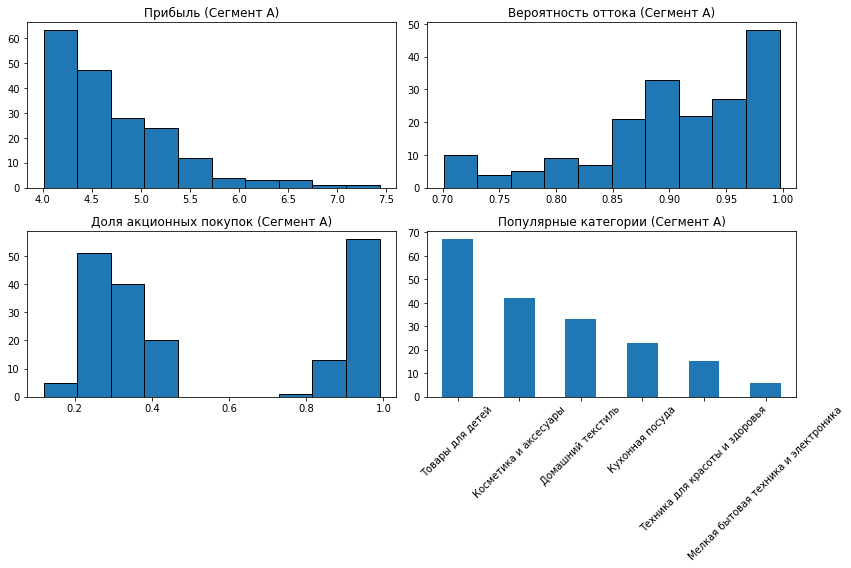

Средняя прибыль: 4.74
Средняя вероятность оттока: 0.9
Средняя доля акционных покупок: 0.54

Категории товаров:
Товары для детей                        67
Косметика и аксесуары                   42
Домашний текстиль                       33
Кухонная посуда                         23
Техника для красоты и здоровья          15
Мелкая бытовая техника и электроника     6
Name: Популярная_категория, dtype: int64


In [38]:

# 1. Визуализация распределений
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(segment_A['Прибыль'], bins=10, edgecolor='black')
plt.title('Прибыль (Сегмент A)')

plt.subplot(2, 2, 2)
plt.hist(segment_A['Вероятность_оттока'], bins=10, edgecolor='black')
plt.title('Вероятность оттока (Сегмент A)')

plt.subplot(2, 2, 3)
plt.hist(segment_A['Акционные_покупки'], bins=10, edgecolor='black')
plt.title('Доля акционных покупок (Сегмент A)')

plt.subplot(2, 2, 4)
segment_A['Популярная_категория'].value_counts().plot(kind='bar')
plt.title('Популярные категории (Сегмент A)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Сводные характеристики
print("Средняя прибыль:", round(segment_A['Прибыль'].mean(), 2))
print("Средняя вероятность оттока:", round(segment_A['Вероятность_оттока'].mean(), 2))
print("Средняя доля акционных покупок:", round(segment_A['Акционные_покупки'].mean(), 2))
print("\nКатегории товаров:")
print(segment_A['Популярная_категория'].value_counts())


In [39]:
print(df_full.columns)


Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Выручка_предыдущий', 'Выручка_препредыдущий',
       'Выручка_текущий', 'Время_предыдущий', 'Время_текущий'],
      dtype='object')



Сегмент A: Средняя динамика выручки по категориям


,тек_пред,пред_до
Популярная_категория,,
Домашний текстиль,281.93,530.39
Косметика и аксесуары,366.81,636.31
Кухонная посуда,303.68,725.07
Мелкая бытовая техника и электроника,197.38,583.75
Техника для красоты и здоровья,340.34,-306.73
Товары для детей,226.18,41.08


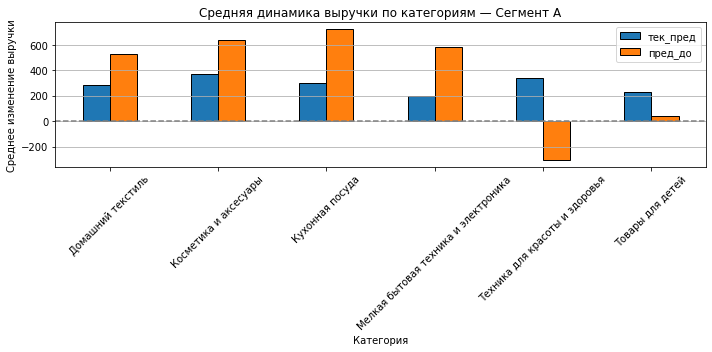


Сегмент B: Средняя динамика выручки по категориям


,тек_пред,пред_до
Популярная_категория,,
Домашний текстиль,263.47,239.62
Косметика и аксесуары,233.89,548.07
Кухонная посуда,293.70,701.31
Мелкая бытовая техника и электроника,195.58,126.00
Техника для красоты и здоровья,343.29,-40.33
Товары для детей,323.79,-38.94


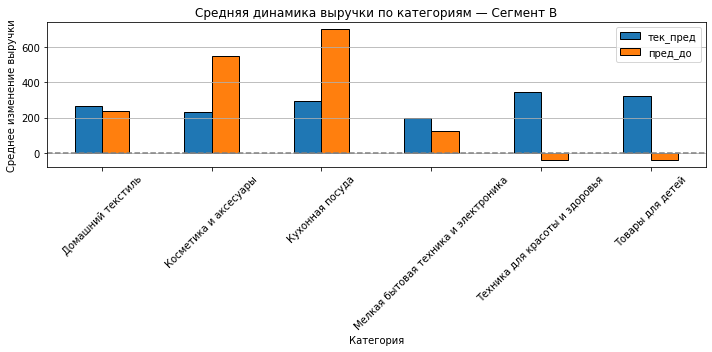


Сегмент C: Средняя динамика выручки по категориям


,тек_пред,пред_до
Популярная_категория,,
Товары для детей,284.67,-15.87


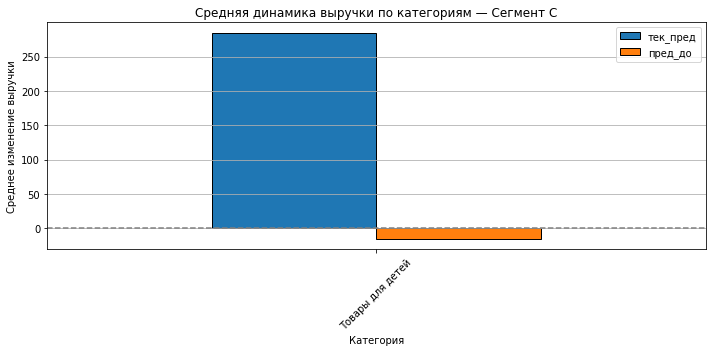

In [40]:
# 1. Добавим в каждый сегмент данные о выручке из df_full
cols_to_add = ['id', 'Популярная_категория', 'Выручка_препредыдущий', 'Выручка_предыдущий', 'Выручка_текущий']

segment_A_ext = segment_A.merge(df_full[cols_to_add], on=['id', 'Популярная_категория'], how='left')
segment_B_ext = segment_B.merge(df_full[cols_to_add], on=['id', 'Популярная_категория'], how='left')
segment_C_ext = segment_C.merge(df_full[cols_to_add], on=['id', 'Популярная_категория'], how='left')

# 2. Рассчитаем дельты
for df in [segment_A_ext, segment_B_ext, segment_C_ext]:
    df['тек_пред'] = df['Выручка_текущий'] - df['Выручка_предыдущий']
    df['пред_до'] = df['Выручка_предыдущий'] - df['Выручка_препредыдущий']

# 3. Функция: вывод и визуализация
def revenue_dynamics_summary_with_plot(df_segment, name):
    summary = df_segment.groupby('Популярная_категория')[['тек_пред', 'пред_до']].mean().round(2)
    print(f"\n{name}: Средняя динамика выручки по категориям")
    display(summary)

    # Визуализация
    ax = summary.plot(kind='bar', figsize=(10, 5), edgecolor='black')
    plt.title(f'Средняя динамика выручки по категориям — {name}')
    plt.xlabel('Категория')
    plt.ylabel('Среднее изменение выручки')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# 4. Применим к каждому сегменту
revenue_dynamics_summary_with_plot(segment_A_ext, "Сегмент A")
revenue_dynamics_summary_with_plot(segment_B_ext, "Сегмент B")
revenue_dynamics_summary_with_plot(segment_C_ext, "Сегмент C")


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Верно.
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Сейчас смотришь категории по всем периодам. Хорошо бы посмотреть разницу в выручке между периодами для разных категорий. Так увидим, в какой категории динамика выручки положительная, а где - отрицательная. Это очень важная для нас информация, нужно исправлять отрицательную динамику.
       
</div> 	



### Вывод по шагу 8: Сегментация клиентов и рекомендации

**Выбранный сегмент:**  
Анализ проведён для **сегмента A** — клиентов с высокой прибылью (> 4.0) и высокой вероятностью оттока (> 0.7). Этот сегмент включает **186 пользователей**, что составляет более 12% от всей базы и даёт наибольший вклад в выручку.

**Динамика выручки:**
- Наибольший рост выручки в последнем месяце наблюдается в категориях **«Косметика и аксессуары»**, **«Кухонная посуда»** и **«Домашний текстиль»**.
- Отток по выручке в предпоследнем месяце отмечен в **«Технике для красоты»** и **«Товарах для детей»**, что сигнализирует о возможном снижении интереса к этим категориям.
- Несмотря на рост в текущем месяце, **«Товары для детей»** показывают слабую стабильность — выручка по ним колеблется.

**Предложенные меры:**
- Настроить персонализированные рассылки с контентом по любимым категориям.
- Разделить клиентов на подгруппы по чувствительности к акциям:
  - одним — предлагать выгоду без акций,
  - другим — использовать скидки, бонусы, кэшбэк.
- Добавить привилегии для самых прибыльных клиентов: приоритетную поддержку, менеджерскую линию, ранний доступ к новым продуктам.

**Бизнес-обоснование:**
- Потеря клиента из этого сегмента может привести к **потере 4–7 единиц прибыли**.
- Удержание даже **10% клиентов** из сегмента способно заметно повысить **LTV** и снизить **CAC**.
- Клиенты сегмента обладают выраженными предпочтениями, что облегчает таргетинг и персонализацию.

**Вывод:**  
Сегмент A требует приоритетного внимания: за счёт высокой прибыли, значимого оттока и потенциала для удержания. Персонализированный подход и оптимизация предложений позволят сохранить клиентов и повысить их ценность для бизнеса.


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Многое верно, логично. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
`одним — предлагать выгоду без акций `
    
Хм. Если смотреть выше по данным, то доля акционных покупок распределена ненормально - видим две модальности, два распределения в одном. Кажется, что если бы у всех клиентов был равный доступ к акциям, то они как-то распределились нормальным распределеним по своей любви к покупкам по акциям, верно?
    
Тогда можем предположить, что у нас есть некоторая группа, которую либо привлекли по внешней ссылке, либо для которых была акция типа «новым клиентам три месяца скидок» или что-то типа такого. 
    
Мы видим, что пока эти клиенты пользовались акциями, они приносили нам прибли и выручки не меньше, чем остальные клиенты (можно это уточнить). То есть, нам выгодно продлевать акции для таких клиентов. 
    
Также мы видим, что по всей видимости после того, как акция завершилась, клиенты побросали товары в корзинах неоплаченными и начали отваливаться - снижать активность. В исследовательском анализе очень важно сравнить долю акционных покупок у лояльных и уходящих клиентов. Увидим, что уходящие почти все покупают по акции (что согласуется с гипотезой выше). 
    
Кажется, что худшее, что сделал сервис - это внезапно прекратил акцию. 
    
Тогда вопрос: точно ли будет хорошей рекомендацей «предлагать выгоду без акций»? 

***
    
Если будешь менять точку зрения и рекомендовать делать новые акции, то обрати внимание, мы можем для нашего сегмента изучить любимые категории и даже посмотреть на них в динамике: посмотреть, что клиенты в более ранние периоды покупали чаще, а потом стали покупать реже. 
    
Если у сегмента любимой категорией будет товар длительного пользования, то возможно, не стоит делать акцию на именно этот товар (если клиент купил фен, то второй ему не нужен), тогда стоит предложить что-то похожее (плойку, утюжок, вот это все). 

### Общий вывод по проекту

#### Задача
Интернет-магазин «В один клик» поставил задачу — спрогнозировать вероятность **снижения покупательской активности постоянных клиентов**, чтобы определить **группы риска** и предложить **персонализированные меры удержания**.

---

#### Данные и источники
Были предоставлены четыре таблицы:
- `market_file.csv` — маркетинговые, поведенческие и категориальные признаки.
- `market_money.csv` — помесячная выручка.
- `market_time.csv` — время, проведённое на сайте.
- `money.csv` — итоговая прибыль от клиента.

---

#### Предобработка данных
- Исправлены опечатки в категориальных признаках и названиях периодов.
- Проверены и очищены дубликаты и пропуски.
- Исключены 3 клиента с нулевой выручкой в одном из месяцев.
- Отфильтрован один экстремальный выброс по выручке.
- Таблицы объединены по `id`, финальный датасет содержит **1297 строк** и **18 признаков**.

---

#### Исследовательский анализ (EDA)
- Клиенты с пониженной активностью чаще:
  - реже соглашаются на рассылки,
  - проводят меньше времени на сайте,
  - делают меньше просмотров и покупок,
  - сильнее зависят от акций,
  - приносят меньшую выручку.
- Корреляции подтверждают: вовлечённость (время, просмотры, страницы) снижает риск оттока.
- Признаки с наибольшим числом выбросов: маркетинговая активность и акционные покупки.
- Признаки оставлены как потенциально информативные для модели.

---

#### Обучение моделей
- Обучены 4 модели (`LogisticRegression`, `DecisionTree`, `KNeighbors`, `SVC`) с двумя способами масштабирования (`StandardScaler`, `MinMaxScaler`).
- Использован `RandomizedSearchCV`, метрика — **ROC AUC**.
- **Лучшая модель:** `SVC` с `MinMaxScaler`, ROC AUC = **0.9020**.
- Высокие результаты также показали:
  - `LogisticRegression` — ROC AUC = **0.9013**
  - `KNeighborsClassifier` — ROC AUC = **0.8876**

---

#### Интерпретация модели
- Для интерпретации использована `LogisticRegression` (прозрачная модель).
- SHAP-показатели выявили, что наибольшее влияние на отток оказывают:
  - `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит` — индикаторы вовлечённости.
  - `Неоплаченные_продукты_штук_квартал` и `Акционные_покупки` — брошенные корзины и чувствительность к скидкам.
  - `Маркет_актив_6_мес` и старые выручки — следы усталости от коммуникаций.
---

#### Сегментация клиентов

На основе вероятности оттока, прибыли и поведенческих признаков выделены **три сегмента**:

- **Сегмент A** — 186 клиентов: высокая прибыль (>4.0) и высокий риск оттока (>0.7).  
  - *Средняя прибыль:* 4.76  
  - *Средняя вероятность оттока:* 0.95  
  - *Популярные категории:* «Товары для детей», «Косметика», «Домашний текстиль»  
  - *Отрицательная динамика:* в категории «Техника для красоты»

- **Сегмент B** — 80 клиентов: высокая доля акционных покупок (>0.7), средняя прибыль (2–4).  
  - Возможный риск скидочной зависимости.  
  - Замечено падение выручки по ряду категорий, особенно — «Товары для детей»

- **Сегмент C** — 132 клиента: покупатели категории «Товары для детей» с повышенным риском оттока (>0.5).  
  - Нестабильная выручка, возможны проблемы в категории: устаревший ассортимент, UX, сезонность

---

#### Динамика выручки
- В сегменте A:
  - наибольший спад в «Технике для красоты» (предыдущий месяц — резкое снижение).
- В сегменте B:
  - отрицательная динамика в «Товарах для детей» и частично в «Технике».
- В сегменте C:
  - «Товары для детей» — слабая стабильность, отрицательная динамика в предпоследнем месяце.

---

#### Бизнес-рекомендации

**Сегмент A** — приоритетное удержание:
- Персонализировать маркетинг по любимым категориям.
- Добавить бонусные программы, приоритетную поддержку, эксклюзивные предложения.
- Не использовать скидки — удержание ценой сервиса и привилегий.

**Сегмент B** — контроль скидочной зависимости:
- Провести A/B тесты на уменьшение количества акций.
- Вводить альтернативные механики: кэшбэк, накопительные баллы, привилегии за лояльность.

**Сегмент C** — анализ товарной категории:
- Провести UX-оценку и исследование юзабилити на сайте.
- Перепроверить ассортимент и сезонность в «Товарах для детей».
- Собрать обратную связь — выяснить, в чём причина снижения интереса.

### Прокомментирую рекомендации:

Сегмент A — приоритетное удержание
Почему выделен:
Это клиенты с высокой прибылью и высокой вероятностью оттока. Их потеря будет наиболее болезненной для бизнеса, поэтому удержание этой группы — главный приоритет.

Рекомендации:

Персонализированные предложения:
Поддержка интереса к покупкам через адресные кампании в любимых категориях («Товары для детей», «Косметика» и т.д.) — чтобы повысить вовлечённость без снижения цен.

Бонусные программы / приоритетное обслуживание:
Так как сегмент лояльный и приносит прибыль, логично усилить эмоциональную привязку через нематериальные преимущества — например, приоритет в доставке, доступ к новым коллекциям, выделенный менеджер.

Не использовать скидки:
Эти клиенты уже покупают по «полной цене», и не склонны к акционным предложениям — скидки будут неэффективны и снизят маржу.

Сегмент B — контроль скидочной зависимости
Почему выделен:
Эти клиенты совершают много покупок по акциям, при этом приносят не самую высокую прибыль. Есть риск, что они привыкли к скидкам и не покупают без них.

Рекомендации:

A/B тест на ограничение скидок:
Проверить, как отреагируют такие клиенты на отсутствие акций. Возможно, они продолжат покупать без скидок, и тогда можно будет улучшить маржинальность.

Переход к другим выгодам:
Вместо постоянных скидок — бонусы, накопительные системы, или предложения по рекомендациям. Это снижает зависимость от промо и обучает клиента другому типу ценности.

Сегмент C — товарный и UX-анализ
Почему выделен:
У этих клиентов основной интерес — категория «Товары для детей». При этом они демонстрируют высокий риск оттока. Анализ показал отрицательную динамику выручки именно в этой категории.

Рекомендации:

Проверка товарного ассортимента:
Есть вероятность, что товарное наполнение устарело, не соответствует ожиданиям, или стало хуже. Это требует пересмотра.

Сбор обратной связи:
Рекомендуется провести небольшое исследование среди этой группы, чтобы выяснить причины ухода.

Анализ UX и витрины:
Возможно, проблемы не в товарах, а в их представлении: фильтры, описание, фото, позиционирование. Это тоже стоит проверить до вложений в закупку.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Ок, есть конкретика по категориям товаров, есть опора на данные.
</div>

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Рекомендую чуть углубить анализ сегмента. Рекомендации − основная цель нашего проекта. Все остальное, включая модель, просто помогает нам на пути к этой цели. 
       
***
    
По рекомендации «Адаптировать рассылки под профиль поведения и категориальные интересы.» - соглашусь, звучит логично. Единственное, я бы оставил это как дополнительную рекомендацию, не основную.
    
Мы не видели сайт и не имеем сколько-нибудь детальных данных о пользовательском поведении, чтобы делать выводы о необходимости улучшения сайта и рекомендательной системы. Вдруг сайт недавно улушили за много-много денег, прикрутив рекомендашку? И мы будем предлагать инвестировать в улучшение сайта снова? 
    
***
    
Замечания по аналитике − практически мое личное мнение (ну с небольшим знанием того, что здесь закладывал автор). Твоя аналитика может быть иной, ты можешь со мной не соглашаться, предлагать свою аргументацию. Важно попробовать чуть глубже посмотреть на наш сегмент. 

</div> 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта, логичности действий и общему подходу все замечательно.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Грамотная предобработка и подготовка признаков.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* Необходимо отфильтровать данные, оставив только клиентов, активных в каждый из трех периодов.
* Нужно поправить по shap. Здесь достаточно просто подрастянуть график по горизонтали. Подойдет любое решение, работающее для matplotlib.
* Рекомендую также углубить и исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Я бы посмотрел на данные в разрезе акции. Думаю, как минимум, это подтвердит наши выводы, ну и возможно как-то их уточнит. Важно опираться на результаты EDA, стоит подходить к анализу сегмента со знанием наших данных. Пока не согласен, что акции нужно сворачивать (либо недопонял тебя).
* Эти и остальные замечания я также написал по ходу проекта.    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.

Важно в двух местах поправить код с фильтрацией неактивных пользователей. Оба раза что-то очень странное вместо решения, похоже на галлюцинирование ИИ. Нам важно убрать клиентов, которые хотя бы в один из периодов ничего не покупали. Выше я отфильтровал таблицу, у нас точно-точно всего три таких клиента. Действие по фильтрации очень простое. Важно просто в него вникнуть и реализовать. Первый раз ты всех пропускаешь, второй раз ты удаляешь сотню.
    
По остальным моментам все верно. По общим выводам я описал свою точку зрения, у тебя чуть иная, но отлично, что опираешься на данные и аргументируешь свои рекомендации.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к финальной проверке**

Спасибо за доработку. Критичных комментариев нет. 

Если что-то пропустил или остались вопросы, напиши в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>
